## Import Semua Packages/Library yang Digunakan

In [ ]:
import gdown
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [ ]:
# ID file train dari Google Drive
#https://drive.google.com/file/d/1ckDuVqPA6SS7x3Si0lT4_B8GMBfDt8t2/view?usp=sharing
file_id = "1ckDuVqPA6SS7x3Si0lT4_B8GMBfDt8t2"
url = f"https://drive.google.com/uc?id={file_id}"

# Download train.csv
gdown.download(url, 'train.csv', quiet=False)

# Membaca dataset
dataset = pd.read_csv("train.csv")

Downloading...
From: https://drive.google.com/uc?id=1ckDuVqPA6SS7x3Si0lT4_B8GMBfDt8t2
To: /content/train.csv
100%|██████████| 13.3k/13.3k [00:00<00:00, 15.0MB/s]


### Assessing Data

Melihat 5 baris teratas pada dataset

In [ ]:
dataset.head()

,Rainfall,Temperature,SoilMoisture,CropType,IrrigationNeeded
0,112.36,38.77,73.20,Padi,1
1,179.60,18.90,15.60,Kacang,1
2,17.43,36.65,60.11,Jagung,1
3,212.42,15.51,96.99,Padi,0
4,249.73,20.31,18.18,Jagung,1


In [ ]:
# Mengubah nama kolom ke bahasa Indonesia
dataset.rename(columns={
    'Rainfall': 'CurahHujan',
    'Temperature': 'Suhu',
    'SoilMoisture': 'KelembapanTanah',
    'CropType': 'JenisTanaman',
    'IrrigationNeeded': 'ButuhIrigasi'
}, inplace=True)

# Menampilkan nama kolom baru
dataset.head()


,CurahHujan,Suhu,KelembapanTanah,JenisTanaman,ButuhIrigasi
0,112.36,38.77,73.20,Padi,1
1,179.60,18.90,15.60,Kacang,1
2,17.43,36.65,60.11,Jagung,1
3,212.42,15.51,96.99,Padi,0
4,249.73,20.31,18.18,Jagung,1


In [ ]:
dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CurahHujan       500 non-null    float64
 1   Suhu             500 non-null    float64
 2   KelembapanTanah  500 non-null    float64
 3   JenisTanaman     500 non-null    object 
 4   ButuhIrigasi     500 non-null    int64  
dtypes: float64(3), int64(1), object(1)
memory usage: 19.7+ KB


In [ ]:
# Pemetaan jenis tanaman
jenis_tanaman_mapping = {
    "Padi": 1,
    "Kacang": 2,
    "Jagung": 3
}

# Mengubah kolom 'JenisTanaman' menjadi angka
dataset['JenisTanaman'] = dataset['JenisTanaman'].map(jenis_tanaman_mapping)


# Menampilkan data setelah perubahan
print("\nData setelah perubahan:")
print(dataset.head())


Data setelah perubahan:
   CurahHujan   Suhu  KelembapanTanah  JenisTanaman  ButuhIrigasi
0      112.36  38.77            73.20             1             1
1      179.60  18.90            15.60             2             1
2       17.43  36.65            60.11             3             1
3      212.42  15.51            96.99             1             0
4      249.73  20.31            18.18             3             1


In [ ]:
print(dataset.dtypes)

CurahHujan         float64
Suhu               float64
KelembapanTanah    float64
JenisTanaman         int64
ButuhIrigasi         int64
dtype: object


In [ ]:
#memeriksa missing value
dataset.isna().sum()

,0
CurahHujan,0
Suhu,0
KelembapanTanah,0
JenisTanaman,0
ButuhIrigasi,0


In [ ]:
#memeriksa data duplikat
dataset.duplicated().sum()

0

In [ ]:
#Memeriksan parameter statistik secara singkat
dataset.describe()

NameError: name 'dataset' is not defined

## Exploratory Data Analysis (EDA)

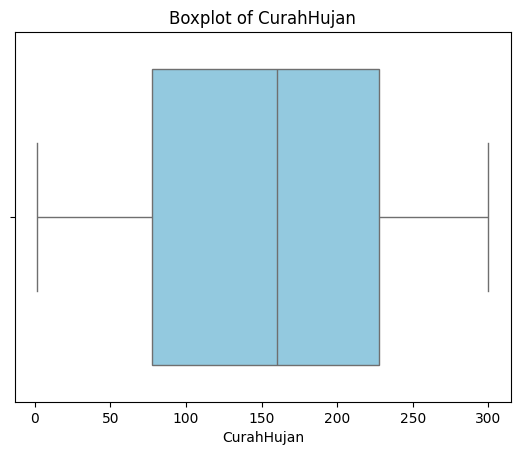

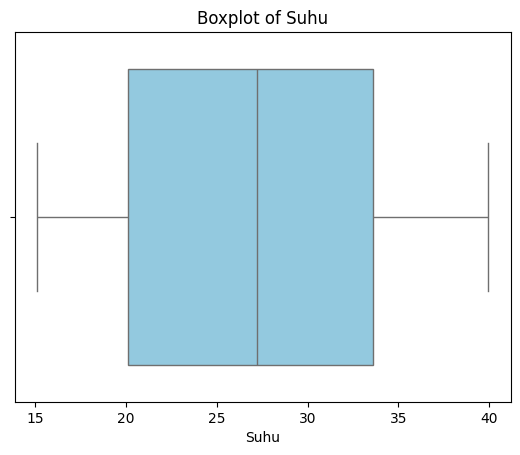

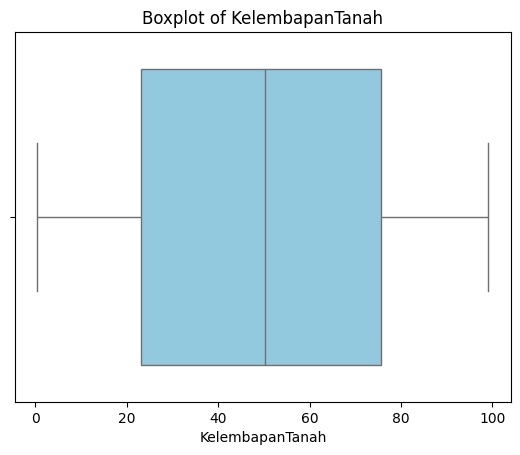

In [ ]:
#Cek outlier data numerik
numeric_columns = ['CurahHujan', 'Suhu', 'KelembapanTanah']
for col in numeric_columns:
    sns.boxplot(x=dataset[col], color='skyblue')
    plt.title(f"Boxplot of {col}")
    plt.show()


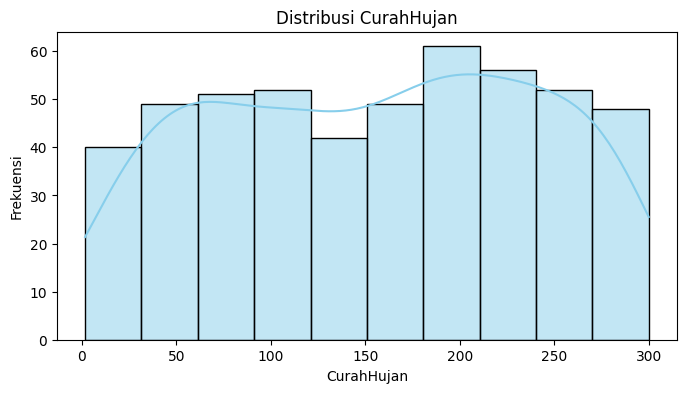

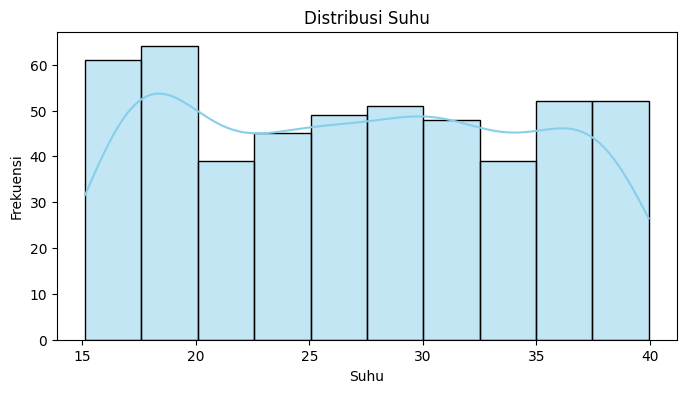

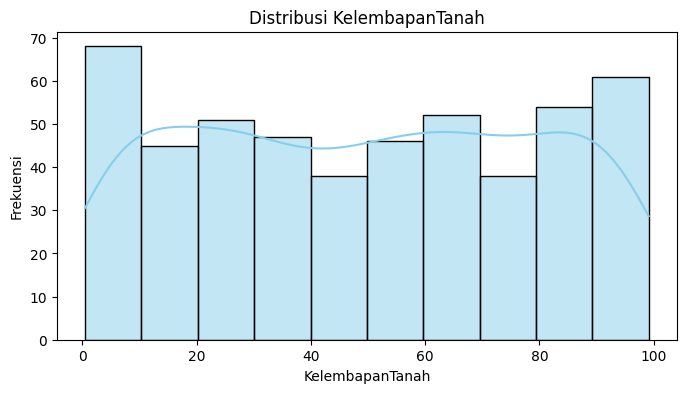

In [ ]:
# Distribusi numerik
numeric_columns = ['CurahHujan', 'Suhu', 'KelembapanTanah']

for col in numeric_columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(dataset[col], kde=True, color='skyblue')
    plt.title(f"Distribusi {col}")
    plt.xlabel(col)
    plt.ylabel('Frekuensi')
    plt.show()


ButuhIrigasi
1    0.664
0    0.336
Name: proportion, dtype: float64


<ipython-input-45-e4d5f89d570d>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=dataset['ButuhIrigasi'], palette='pastel')


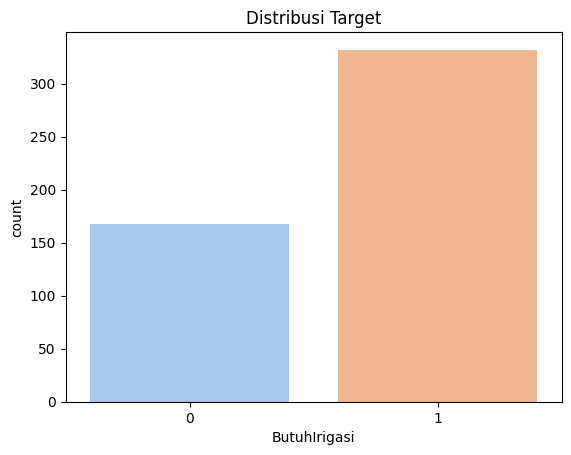

In [ ]:
#Cek distribusi dataset
print(dataset['ButuhIrigasi'].value_counts(normalize=True))
sns.countplot(x=dataset['ButuhIrigasi'], palette='pastel')
plt.title("Distribusi Target")
plt.show()


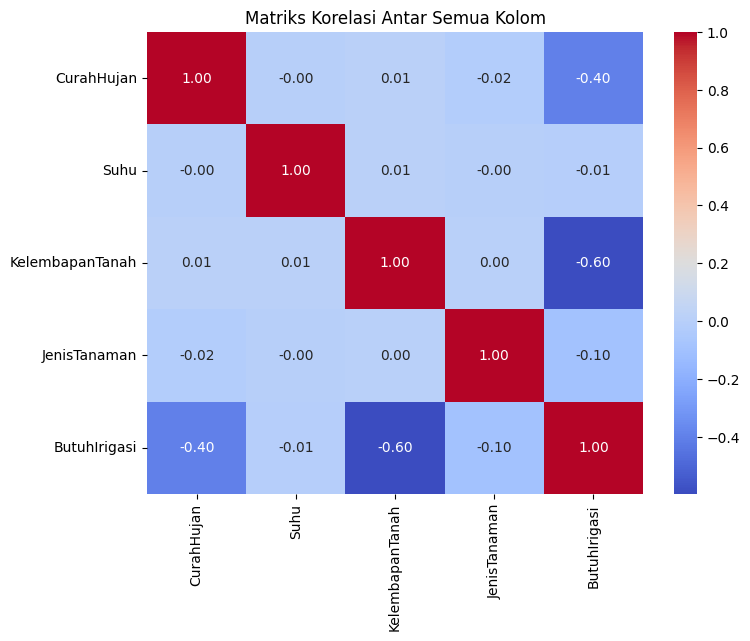

In [ ]:
# Menghitung korelasi antar kolom
correlation_matrix = dataset.corr()

# Visualisasi heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Matriks Korelasi Antar Semua Kolom")
plt.show()


In [ ]:
# Korelasi dengan ButuhIrigasi
correlation_with_target = correlation_matrix['ButuhIrigasi'].sort_values(ascending=False)
print("Korelasi dengan ButuhIrigasi:")
print(correlation_with_target)


Korelasi dengan ButuhIrigasi:
ButuhIrigasi       1.000000
Suhu              -0.007062
JenisTanaman      -0.098286
CurahHujan        -0.398553
KelembapanTanah   -0.598014
Name: ButuhIrigasi, dtype: float64


## Training Data

Accuracy on Training Data: 100.00%

Classification Report for Test Data:
              precision    recall  f1-score   support

           0       0.90      1.00      0.95        38
           1       1.00      0.94      0.97        62

    accuracy                           0.96       100
   macro avg       0.95      0.97      0.96       100
weighted avg       0.96      0.96      0.96       100



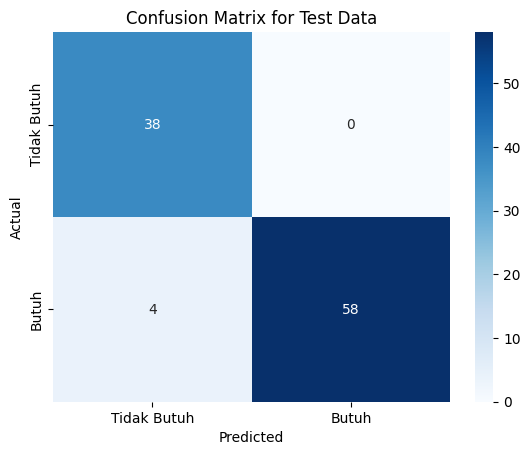

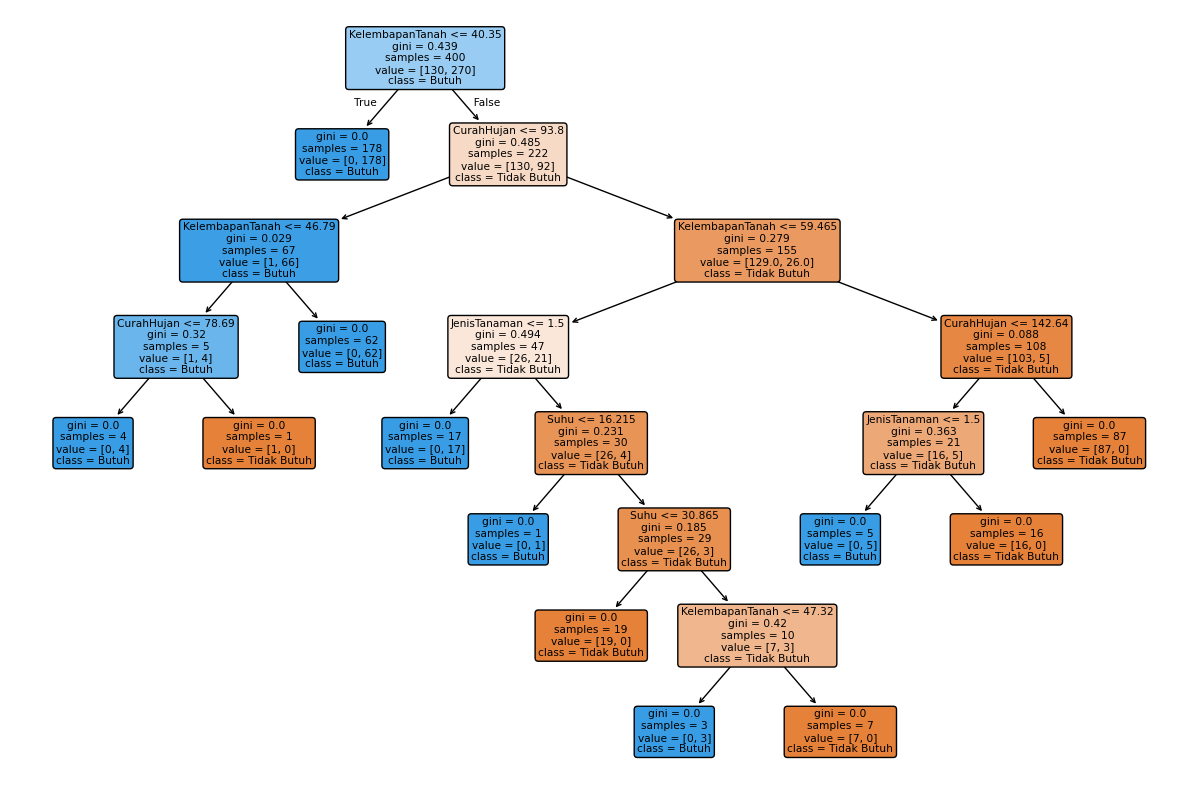

In [ ]:


# Pisahkan Fitur dan Target
X = dataset[['CurahHujan', 'Suhu', 'KelembapanTanah', 'JenisTanaman']]  # Fitur
y = dataset['ButuhIrigasi']  # Target

# Split Data untuk Training dan Testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Buat dan Latih Model Decision Tree
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Prediksi
y_pred_train = model.predict(X_train)  # Prediksi pada data training
y_pred_test = model.predict(X_test)  # Prediksi pada data testing

# Evaluasi Akurasi untuk Training dan Testing
accuracy_train = accuracy_score(y_train, y_pred_train)
#accuracy_test = accuracy_score(y_test, y_pred_test)

print(f"Accuracy on Training Data: {accuracy_train * 100:.2f}%")
#print(f"Accuracy on Testing Data: {accuracy_test * 100:.2f}%")

print("\nClassification Report for Test Data:")
print(classification_report(y_test, y_pred_test))

# Visualisasi Confusion Matrix untuk Test Data
cm = confusion_matrix(y_test, y_pred_test)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Tidak Butuh', 'Butuh'], yticklabels=['Tidak Butuh', 'Butuh'])
plt.title('Confusion Matrix for Test Data')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Visualisasi Decision Tree
plt.figure(figsize=(15, 10))
plot_tree(model, feature_names=X.columns, class_names=['Tidak Butuh', 'Butuh'], filled=True, rounded=True)
plt.show()


## Data Testing

In [ ]:
# ID file train dari Google Drive
# https://drive.google.com/file/d/1tBzOh9_Kv0-jhr8vJTOqJIaHBmr3-1nF/view?usp=sharing
# Step 1: Download train.csv
file_id = "1eRo4Ya-tqAXzWLBI2o1ckQ7vqoOlTCbh"
url = f"https://drive.google.com/uc?id={file_id}"
gdown.download(url, 'train.csv', quiet=False)

# Load Dataset
dataset = pd.read_csv('train.csv')

# Mapping 'JenisTanaman' ke angka
jenis_tanaman_mapping = {
    "Padi": 1,
    "Kacang": 2,
    "Jagung": 3
}
dataset['JenisTanaman'] = dataset['JenisTanaman'].map(jenis_tanaman_mapping)


Downloading...
From: https://drive.google.com/uc?id=1eRo4Ya-tqAXzWLBI2o1ckQ7vqoOlTCbh
To: /content/train.csv
100%|██████████| 8.04k/8.04k [00:00<00:00, 9.38MB/s]


In [ ]:
dataset.isna().sum()

,0
Bulan,0
Kuartal,0
JenisTanaman,0
CurahHujan,0
Suhu,0
KelembapanTanah,0
ButuhIrigasi,0


In [ ]:
# Pisahkan Fitur dan Target
X_test = dataset[['CurahHujan', 'Suhu', 'KelembapanTanah', 'JenisTanaman']]  # Fitur
y_test = dataset['ButuhIrigasi']  # Target

# Prediksi menggunakan model yang sudah dilatih
y_pred_test = model.predict(X_test)

# Evaluasi Akurasi untuk Testing Data
accuracy_test = accuracy_score(y_test, y_pred_test)
print(f"Accuracy on Testing Data: {accuracy_test * 100:.2f}%")

# Classification Report untuk Test Data
print("\nClassification Report for Test Data:")
print(classification_report(y_test, y_pred_test))

Accuracy on Testing Data: 98.15%

Classification Report for Test Data:
              precision    recall  f1-score   support

           0       1.00      0.95      0.97        38
           1       0.97      1.00      0.99        70

    accuracy                           0.98       108
   macro avg       0.99      0.97      0.98       108
weighted avg       0.98      0.98      0.98       108



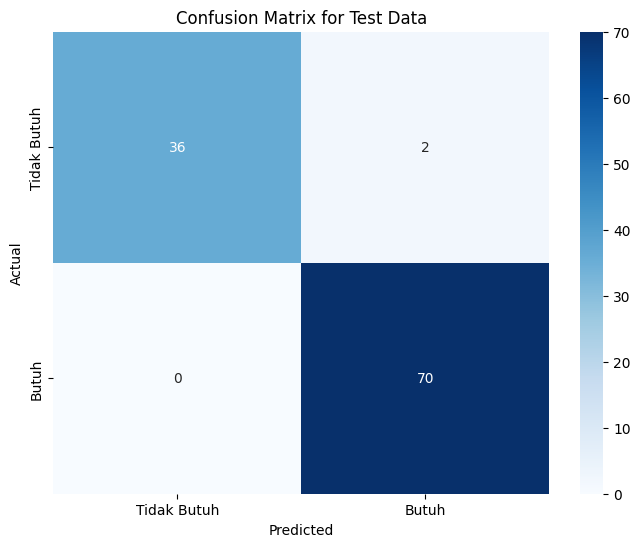

In [ ]:
# Visualisasi Confusion Matrix untuk Test Data
cm = confusion_matrix(y_test, y_pred_test)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Tidak Butuh', 'Butuh'], yticklabels=['Tidak Butuh', 'Butuh'])
plt.title('Confusion Matrix for Test Data')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [ ]:
dataset.head()

,Bulan,Kuartal,JenisTanaman,CurahHujan,Suhu,KelembapanTanah,ButuhIrigasi
0,Januari,Q1,1,124.908024,20.719954,32.777979,0
1,Januari,Q1,2,240.142861,16.924498,62.254398,0
2,Januari,Q1,3,196.398788,22.243786,55.474303,0
3,Januari,Q2,1,169.731697,19.030532,69.445639,0
4,Januari,Q2,2,81.203728,38.242441,56.032902,1


In [ ]:
# Add prediction results to the dataset
dataset['PrediksiButuhIrigasi'] = y_pred_test

# Menampilkan beberapa baris hasil prediksi
print(dataset[['Bulan', 'Kuartal', 'JenisTanaman', 'CurahHujan', 'Suhu', 'KelembapanTanah', 'PrediksiButuhIrigasi', 'ButuhIrigasi']].head())


     Bulan Kuartal  JenisTanaman  CurahHujan       Suhu  KelembapanTanah  \
0  Januari      Q1             1  124.908024  20.719954        32.777979   
1  Januari      Q1             2  240.142861  16.924498        62.254398   
2  Januari      Q1             3  196.398788  22.243786        55.474303   
3  Januari      Q2             1  169.731697  19.030532        69.445639   
4  Januari      Q2             2   81.203728  38.242441        56.032902   

   PrediksiButuhIrigasi  ButuhIrigasi  
0                     1             0  
1                     0             0  
2                     0             0  
3                     0             0  
4                     1             1  


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Urutan bulan
ordered_months = ['Januari', 'Februari', 'Maret', 'April', 'Mei', 'Juni',
                  'Juli', 'Agustus', 'September', 'Oktober', 'November', 'Desember']

# Pastikan kolom 'Bulan' adalah kategori terurut
dataset['Bulan'] = pd.Categorical(dataset['Bulan'], categories=ordered_months, ordered=True)

# Kelompokkan data berdasarkan Bulan dan JenisTanaman
monthly_irrigation = dataset.groupby(['Bulan', 'JenisTanaman'])['PrediksiButuhIrigasi'].sum().reset_index()

# Pivot data agar Bulan menjadi kolom dan JenisTanaman menjadi baris
monthly_irrigation_pivot = monthly_irrigation.pivot(index='JenisTanaman', columns='Bulan', values='PrediksiButuhIrigasi')
monthly_irrigation_pivot = monthly_irrigation_pivot.fillna(0)  # Isi NaN dengan 0

# # Plot Line Chart
# plt.figure(figsize=(12, 6))
# sns.lineplot(data=monthly_irrigation_pivot.T, markers=True)
# plt.title('Jumlah Prediksi Tanaman yang Butuh Irigasi dari Januari hingga Desember')
# plt.xlabel('Bulan')
# plt.ylabel('Jumlah Prediksi Butuh Irigasi')
# plt.legend(title='Jenis Tanaman', loc='upper left')
# plt.xticks(rotation=45)
# plt.grid(True)
# plt.tight_layout()
# plt.show()


<ipython-input-67-8b9709dc6887>:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_irrigation = dataset.groupby(['Bulan', 'JenisTanaman'])['PrediksiButuhIrigasi'].sum().reset_index()


<ipython-input-68-f69c1df2556c>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  trend_data = dataset.groupby(['Bulan', 'Kuartal'])['PrediksiButuhIrigasi'].mean().reset_index()
<ipython-input-68-f69c1df2556c>:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=trend_data, x='Bulan', y='PrediksiButuhIrigasi', hue='Kuartal', ci=None, palette='Blues')


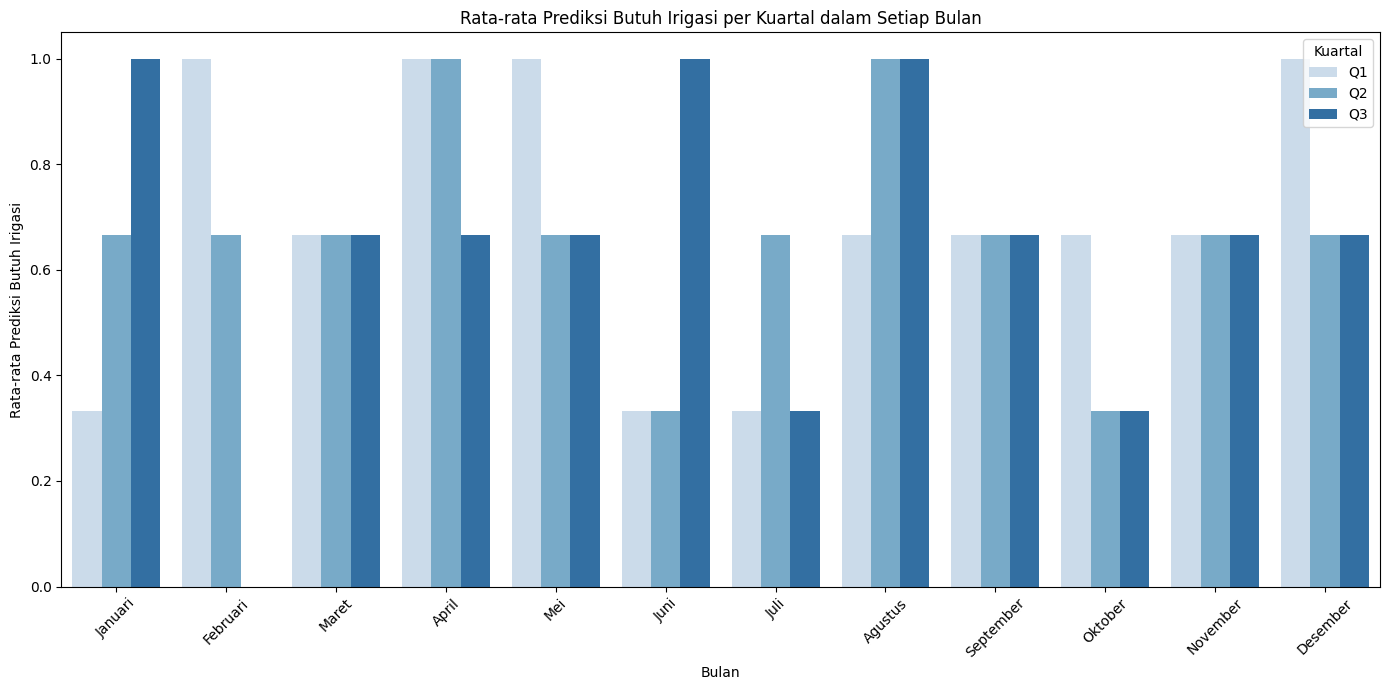

In [ ]:
# === 2. Bar Chart untuk perbandingan rata-rata antar Kuartal dalam setiap Bulan ===
# Assuming 'dataset' is your DataFrame with the required columns
trend_data = dataset.groupby(['Bulan', 'Kuartal'])['PrediksiButuhIrigasi'].mean().reset_index()

plt.figure(figsize=(14, 7))
sns.barplot(data=trend_data, x='Bulan', y='PrediksiButuhIrigasi', hue='Kuartal', ci=None, palette='Blues')
plt.title('Rata-rata Prediksi Butuh Irigasi per Kuartal dalam Setiap Bulan')
plt.xlabel('Bulan')
plt.ylabel('Rata-rata Prediksi Butuh Irigasi')
plt.legend(title='Kuartal', loc='upper right')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<ipython-input-69-73cd4482daa1>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  heatmap_data = dataset.groupby(['Bulan', 'JenisTanaman'])['PrediksiButuhIrigasi'].mean().reset_index()


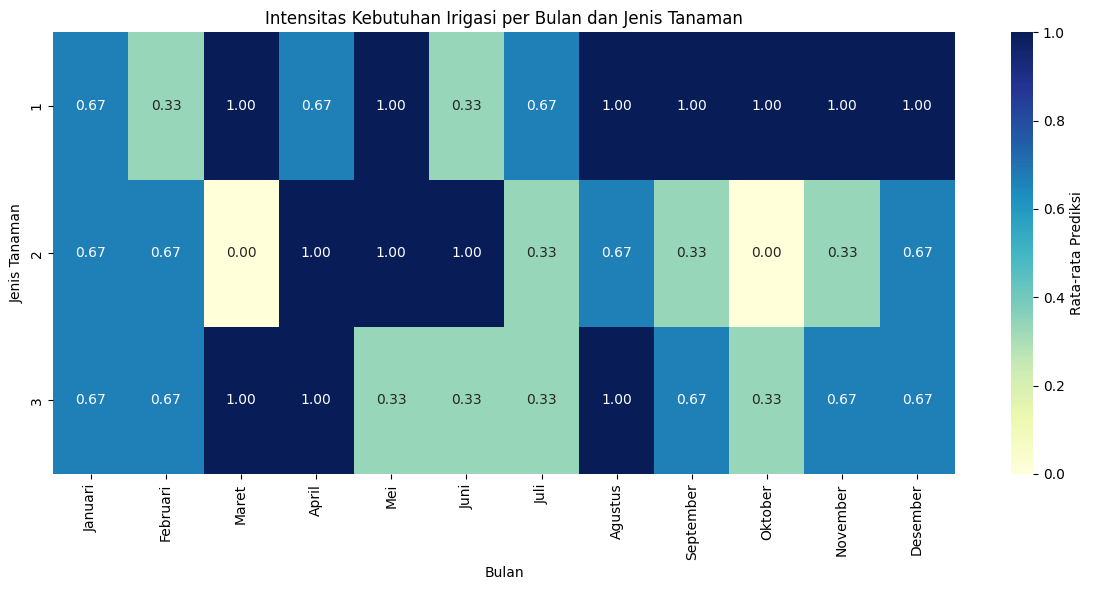

In [ ]:
# === 3. Heatmap untuk intensitas kebutuhan irigasi (Bulan x Jenis Tanaman) ===
# Hitung rata-rata per Bulan dan Jenis Tanaman
heatmap_data = dataset.groupby(['Bulan', 'JenisTanaman'])['PrediksiButuhIrigasi'].mean().reset_index()

# Ubah penggunaan positional arguments menjadi keyword arguments
heatmap_pivot = heatmap_data.pivot(index='JenisTanaman', columns='Bulan', values='PrediksiButuhIrigasi')

plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_pivot, annot=True, fmt=".2f", cmap='YlGnBu', cbar_kws={'label': 'Rata-rata Prediksi'})
plt.title('Intensitas Kebutuhan Irigasi per Bulan dan Jenis Tanaman')
plt.xlabel('Bulan')
plt.ylabel('Jenis Tanaman')
plt.tight_layout()
plt.show()

<ipython-input-70-2113f230d385>:19: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=data, x='Bulan', y='PrediksiButuhIrigasi', hue='Kuartal', estimator='mean', ci=None,


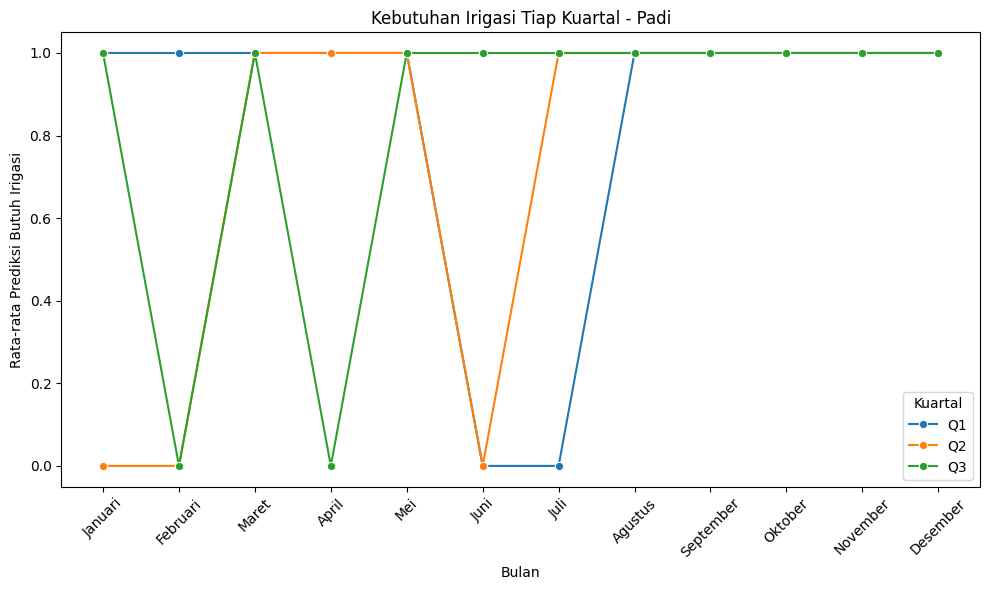

<ipython-input-70-2113f230d385>:19: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=data, x='Bulan', y='PrediksiButuhIrigasi', hue='Kuartal', estimator='mean', ci=None,


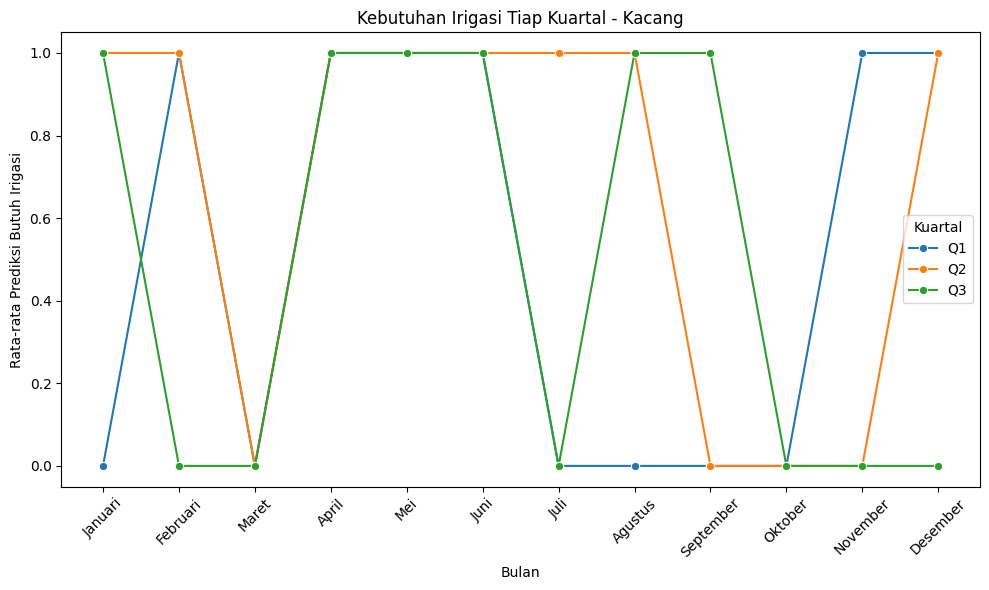

<ipython-input-70-2113f230d385>:19: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=data, x='Bulan', y='PrediksiButuhIrigasi', hue='Kuartal', estimator='mean', ci=None,


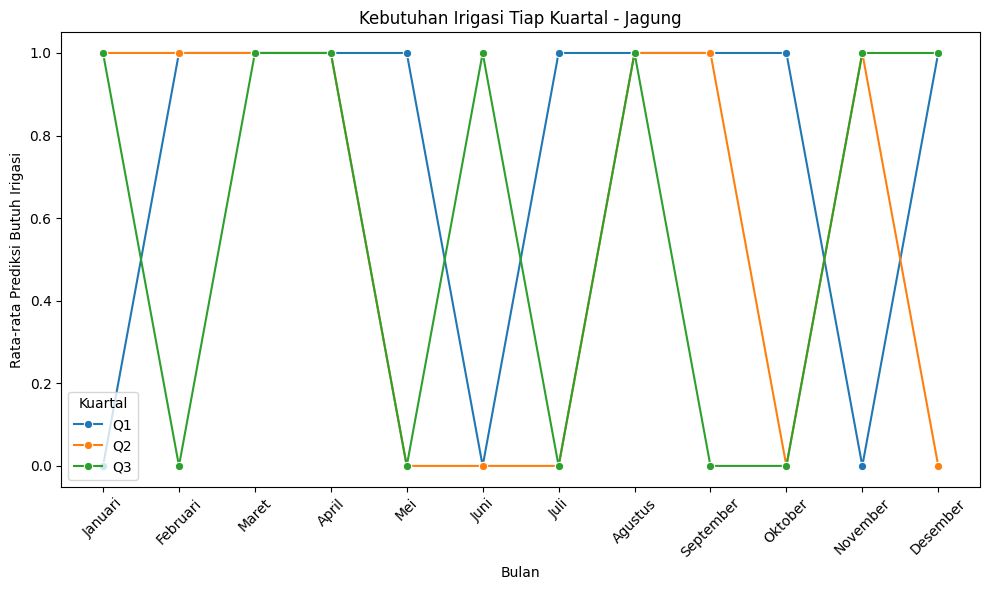

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ubah nilai JenisTanaman menjadi nama tanaman
dataset['NamaTanaman'] = dataset['JenisTanaman'].replace({1: 'Padi', 2: 'Kacang', 3: 'Jagung'})

# Atur urutan bulan
ordered_months = ['Januari', 'Februari', 'Maret', 'April', 'Mei', 'Juni',
                  'Juli', 'Agustus', 'September', 'Oktober', 'November', 'Desember']

# Filter data per jenis tanaman
tanaman_padi = dataset[dataset['NamaTanaman'] == 'Padi']
tanaman_kacang = dataset[dataset['NamaTanaman'] == 'Kacang']
tanaman_jagung = dataset[dataset['NamaTanaman'] == 'Jagung']

# Fungsi untuk plot line chart
def plot_line_chart(data, title):
    plt.figure(figsize=(10, 6))
    sns.lineplot(data=data, x='Bulan', y='PrediksiButuhIrigasi', hue='Kuartal', estimator='mean', ci=None,
                 marker='o', sort=False)
    plt.title(title)
    plt.xlabel('Bulan')
    plt.ylabel('Rata-rata Prediksi Butuh Irigasi')
    plt.xticks(rotation=45)
    plt.legend(title='Kuartal')
    plt.tight_layout()
    plt.show()

# Plot untuk Padi
plot_line_chart(tanaman_padi, 'Kebutuhan Irigasi Tiap Kuartal - Padi')

# Plot untuk Kacang
plot_line_chart(tanaman_kacang, 'Kebutuhan Irigasi Tiap Kuartal - Kacang')

# Plot untuk Jagung
plot_line_chart(tanaman_jagung, 'Kebutuhan Irigasi Tiap Kuartal - Jagung')


In [ ]:
# Urutkan data berdasarkan Bulan dan Kuartal
dataset['Bulan'] = pd.Categorical(dataset['Bulan'], categories=ordered_months, ordered=True)
dataset = dataset.sort_values(['Bulan', 'Kuartal'])

# Cek kuartal per bulan
print(dataset[['Bulan', 'Kuartal']].drop_duplicates())


         Bulan Kuartal
0      Januari      Q1
3      Januari      Q2
6      Januari      Q3
9     Februari      Q1
12    Februari      Q2
15    Februari      Q3
18       Maret      Q1
21       Maret      Q2
24       Maret      Q3
27       April      Q1
30       April      Q2
33       April      Q3
36         Mei      Q1
39         Mei      Q2
42         Mei      Q3
45        Juni      Q1
48        Juni      Q2
51        Juni      Q3
54        Juli      Q1
57        Juli      Q2
60        Juli      Q3
63     Agustus      Q1
66     Agustus      Q2
69     Agustus      Q3
72   September      Q1
75   September      Q2
78   September      Q3
81     Oktober      Q1
84     Oktober      Q2
87     Oktober      Q3
90    November      Q1
93    November      Q2
96    November      Q3
99    Desember      Q1
102   Desember      Q2
105   Desember      Q3
